# Q2

In [94]:
# List of d values to iterate over
d_values = [1, 5, 20, 50]
results = []

# Define a function to calculate the mean squared error and mean absolute error
def calculate_metrics(true_ratings, predicted_ratings):
    mse = np.mean((true_ratings[true_ratings != 0] - predicted_ratings[true_ratings != 0]) ** 2)
    mae = np.mean(np.abs(true_ratings[true_ratings != 0] - predicted_ratings[true_ratings != 0]))
    return mse, mae

for d in d_values:
    # Perform SVD with current d
    U_d, sigma_d, Vt_d = svds(train_matrix, k=d)
    sigma_d = np.diag(sigma_d)
    
    # Predict ratings for both training and test sets
    predicted_ratings_train_d = np.dot(np.dot(U_d, sigma_d), Vt_d)
    
    # Calculate MSE and MAE for the training set
    train_mse_d, train_mae_d = calculate_metrics(train_matrix, predicted_ratings_train_d)
    
    # For the test set, use the same U and Vt to predict ratings
    predicted_ratings_test_d = np.dot(np.dot(U_d, sigma_d), Vt_d)
    
    # Calculate MSE and MAE for the test set
    test_mse_d, test_mae_d = calculate_metrics(test_matrix, predicted_ratings_test_d)
    
    # Append results
    results.append({
        "d": d,
        "train_mse": train_mse_d,
        "train_mae": train_mae_d,
        "test_mse": test_mse_d,
        "test_mae": test_mae_d
    })

# Save to a JSON file
output_path = "./data/q2.json"
with open(output_path, "w") as outfile:
    json.dump(results, outfile, indent=2)

output_path

'./data/q2.json'

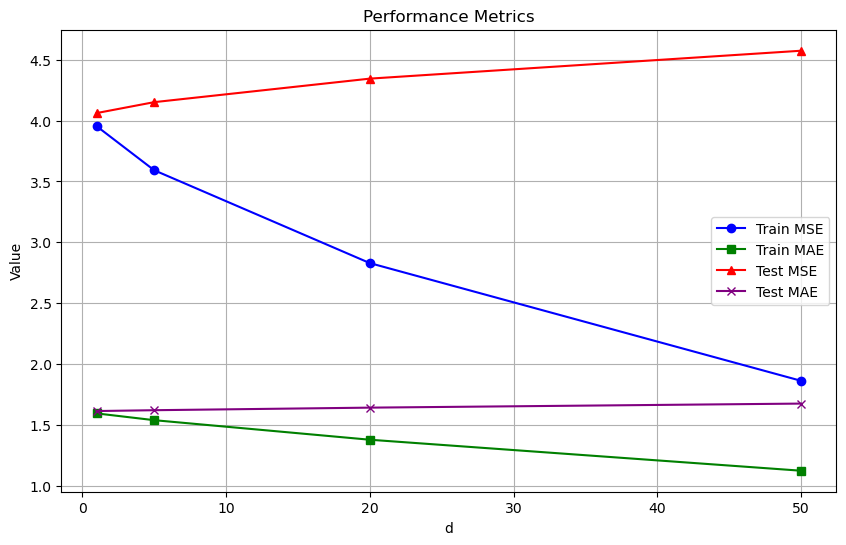

In [95]:
with open('./data/q2.json', 'r') as file:
    data = json.load(file)

# Extracting values
d = [item["d"] for item in data]
train_mse = [item["train_mse"] for item in data]
train_mae = [item["train_mae"] for item in data]
test_mse = [item["test_mse"] for item in data]
test_mae = [item["test_mae"] for item in data]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(d, train_mse, marker='o', color='blue', label='Train MSE')
plt.plot(d, train_mae, marker='s', color='green', label='Train MAE')
plt.plot(d, test_mse, marker='^', color='red', label='Test MSE')
plt.plot(d, test_mae, marker='x', color='purple', label='Test MAE')

plt.xlabel('d')
plt.ylabel('Value')
plt.title('Performance Metrics')
plt.legend()
plt.grid(True)
plt.savefig('./SVD_Performance_Plot.png')  # Save the plot as a PNG file
plt.show()

This is the plot of error metrics on the train and test as a function of d = [1, 2, 5, 10, 20, 50]

- **Training MSE**: 
    - This line shows a decreasing trend as 'd' increases. This is expected since more singular values generally capture more of the data's variance, leading to a better fit on the training data.
  
- **Training MAE**: 
    - The training MAE decreases slightly as 'd' increases and then stabilizes. This indicates that the model's average error per prediction on the training data improves marginally with more singular values but reaches a point where adding more does not make a significant difference.

- **Test MSE**: 
    - The test MSE slightly increase across different values of 'd'. This trend suggests that as the model includes more singular values, it begins to overfit the training data by capturing noise or patterns that do not generalize well to the unseen test data.

- **Test MAE**: 
    - Similar to the test MSE, the test MAE is relatively flat, which might indicate that while the squared errors (which give more weight to larger errors) increase with complexity, the average error does not change much. 